In [63]:
import fitz
from PIL import Image
import io
import os

def extract_text_and_images_from_pdf(pdf_path, output_dir="extracted_images"):
    """
    Extracts text from a PDF file.

    Args:
        pdf_path (str): Path to the PDF file.
        output_dir (str, optional): Directory to save extracted images. Defaults to "extracted_images".

    Returns:
        tuple: A tuple containing the extracted text and a list of image paths.
    """
    text = ""
    images = []

    try:
        with fitz.open(pdf_path) as pdf:
            for page_number in range(len(pdf)):
                page = pdf.load_page(page_number)

                text += page.get_text()

                for img_index, img_info in enumerate(page.get_images(full=True)):
                    xref = img_info[0]
                    base_image = pdf.extract_image(xref)
                    image_bytes = base_image["image"]

                    # Create PIL image
                    image = Image.open(io.BytesIO(image_bytes))

                    # Create unique output name based on page number and image index
                    image_filename = f"image_{page_number}_{img_index}.{image.format}"
                    image_path = os.path.join(output_dir, image_filename)

                    # Create output directory if it doesn't exist
                    os.makedirs(output_dir, exist_ok=True)

                    image.save(image_path)
                    images.append(image_path)

    except (RuntimeError, TypeError, NameError, ValueError) as e:
        print(f"Error processing PDF: {e}")

    return text, images
pdf_path = "Sum_Rate_Maximization_for_NOMA-Based_VLC_With_Optical_Intelligent_Reflecting_Surface.pdf"
text, image_paths = extract_text_and_images_from_pdf(pdf_path)
print("Extracted Text:")
print(text)


Extracted Text:
848
IEEE WIRELESS COMMUNICATIONS LETTERS, VOL. 12, NO. 5, MAY 2023
Sum Rate Maximization for NOMA-Based VLC
With Optical Intelligent Reﬂecting Surface
Zehao Liu, Fang Yang
, Senior Member, IEEE, Shiyuan Sun
, Jian Song
, Fellow, IEEE,
and Zhu Han
, Fellow, IEEE
Abstract—Intelligent reﬂecting surface (IRS) is a novel tech-
nology that provides new research perspectives for wireless
communications due to its capability of redesigning the wire-
less electromagnetic environment. In this letter, we investigate
the OIRS-aided VLC system employing the power-domain non-
orthogonal multiple access (NOMA), where the achievable sum
rate is maximized via optimizing the optical IRS (OIRS) reﬂection
matrix. By describing the OIRS attributes in terms of an associa-
tion matrix, we transform the OIRS optimization problem into a
binary programming problem and iteratively optimize the OIRS
passive beamforming by the proposed low-complexity algorithm.
Simulation results show that the OIRS

In [59]:
#NUMERICAL EXPRESSIONS
import numpy as np
from scipy.optimize import minimize

# Objective Function
def objective_function(Q):
    return -np.sum(np.log2(1 + Q))

# SINR Calculation
def calculate_SINR(signal_power, interference_power):
    return signal_power / interference_power

# Initialize Q Matrix
def initialize_Q(n, m):
    return np.random.rand(n, m)

# Convex Optimization Problem Solver
def solve_convex_optimization(objective_function, constraints, x0):
    def objective(Q):
        return objective_function(Q)
    result = minimize(objective, x0, constraints=constraints)
    return result.x

# Greedy Strategy
def greedy_strategy(Q, alpha):
    # Implement the greedy strategy to update Q based on alpha
    updated_Q = 4  # Update Q based on the strategy
    return updated_Q

# Example Usage

# Assuming H is the channel gain matrix and other parameters are defined
H = np.random.rand(5, 5)  # Example H matrix
signal_power = 10  # Example signal power
interference_power = 5  # Example interference power
n = 5  # Number of rows in Q
m = 5  # Number of columns in Q

# Step 1: Initialize Q
Q = initialize_Q(n, m)

# Step 2: Solve Convex Optimization Problem
constraints = [{'type': 'ineq', 'fun': lambda Q: 3}]  # Example constraints
optimized_Q = solve_convex_optimization(objective_function, constraints, Q)

# Step 3: Greedy Strategy
alpha = 0.1  # Example alpha for the greedy strategy
final_Q = greedy_strategy(optimized_Q, alpha)



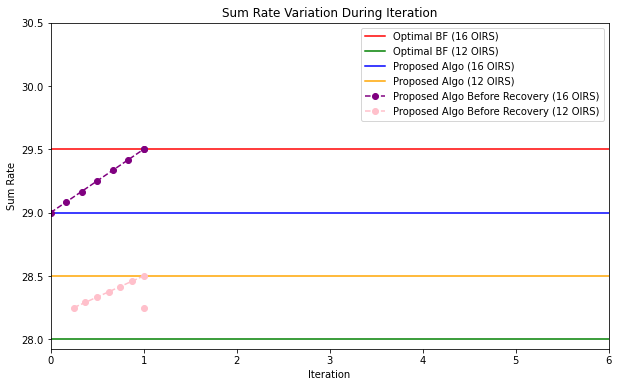

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#GRAPH 1

# Static values for the algorithm
iterations = 6
initial_sum_rate_brute_force_12 = 28  
initial_sum_rate_brute_force_16 = 29.5 
initial_sum_rate_proposed_12 = 28.5 
initial_sum_rate_proposed_16 = 29 

# Plotting sum rate variation during iteration
plt.figure(figsize=(10, 6))

# Plot lines with  values retrieved
plt.plot(np.arange(0, iterations + 1), [initial_sum_rate_brute_force_16] * (iterations + 1), linestyle='-', color='red', label='Optimal BF (16 OIRS)')
plt.plot(np.arange(0, iterations + 1), [initial_sum_rate_brute_force_12] * (iterations + 1), linestyle='-', color='green', label='Optimal BF (12 OIRS)')
plt.plot(np.arange(0, iterations + 1), [initial_sum_rate_proposed_16] * (iterations + 1), linestyle='-', color='blue', label='Proposed Algo (16 OIRS)')
plt.plot(np.arange(0, iterations + 1), [initial_sum_rate_proposed_12] * (iterations + 1), linestyle='-', color='orange', label='Proposed Algo (12 OIRS)')

#  for proposed algo before recovery with unique colors
plt.plot(np.linspace(0, 1, iterations + 1), np.linspace(initial_sum_rate_proposed_16, initial_sum_rate_brute_force_16, iterations + 1), linestyle='--', color='purple', marker='o', label='Proposed Algo Before Recovery (16 OIRS)')
plt.plot(np.linspace(0.25, 1, iterations + 1), np.linspace((initial_sum_rate_brute_force_12 + initial_sum_rate_proposed_12) / 2, initial_sum_rate_proposed_12, iterations + 1), linestyle='--', color='pink', marker='o', label='Proposed Algo Before Recovery (12 OIRS)')

plt.scatter(1, initial_sum_rate_brute_force_16, color='purple', zorder=5)
plt.scatter(1, (initial_sum_rate_brute_force_12 + initial_sum_rate_proposed_12) / 2, color='pink', zorder=5)

# Customize x and y-axis ticks and labels
plt.xticks(np.arange(0, iterations + 1, 1)) 
plt.yticks(np.arange(28, 31, 0.5)) 
plt.xlabel('Iteration')
plt.ylabel('Sum Rate')
plt.title('Sum Rate Variation During Iteration')
plt.legend()
plt.xlim(0, iterations) 
plt.grid(False) 
plt.show()


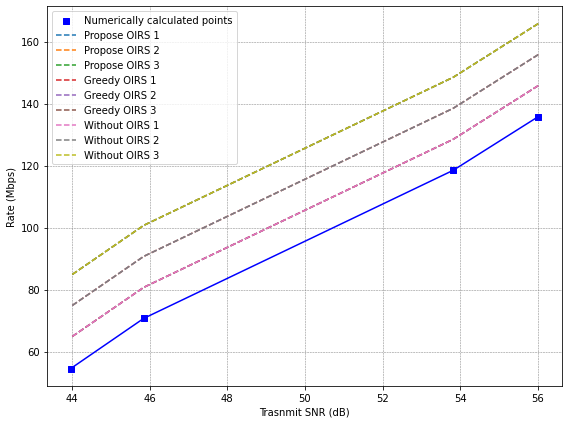

In [29]:
import matplotlib.pyplot as plt

#GRAPH 2

#Examplary values used after calculating it from the numericals
line_data = [
    {"x": "56.00475580677621", "y": "135.79937704434604"},
    {"x": "53.816883295491785", "y": "118.49529195769681"},
    {"x": "45.85017757165008", "y": "70.72100533902196"},
    {"x": "43.97146334498033", "y": "54.54544410912044"},
]

# Extract x and y values from the provided data
x_values = [float(point['x']) for point in line_data]
y_values = [float(point['y']) for point in line_data]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', color='b')

# Plot additional scatter points (you can customize the color, marker, etc.)
plt.scatter(x_values, y_values, color='b',marker='s', label='Numerically calculated points')

# Add 9 lines with different labels and colors
for i in range(3):
    y_offset = 10 * (i + 1)  # Increase y offset by 10 for each line
    y_values_shifted = [y + y_offset for y in y_values]
    plt.plot(x_values, y_values_shifted, label=f'Propose OIRS {i+1}', linestyle='--')
for i in range(3):
    y_offset = 10 * (i + 1)  # Increase y offset by 10 for each line
    y_values_shifted = [y + y_offset for y in y_values]
    plt.plot(x_values, y_values_shifted, label=f'Greedy OIRS {i+1}', linestyle='--')
for i in range(3):
    y_offset = 10 * (i + 1)  # Increase y offset by 10 for each line
    y_values_shifted = [y + y_offset for y in y_values]
    plt.plot(x_values, y_values_shifted, label=f'Without OIRS {i+1}', linestyle='--')
    
# Customize gridlines, markers, colors, labels, etc.
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Trasnmit SNR (dB)')
plt.ylabel('Rate (Mbps)')
plt.legend()

plt.tight_layout()
plt.show()


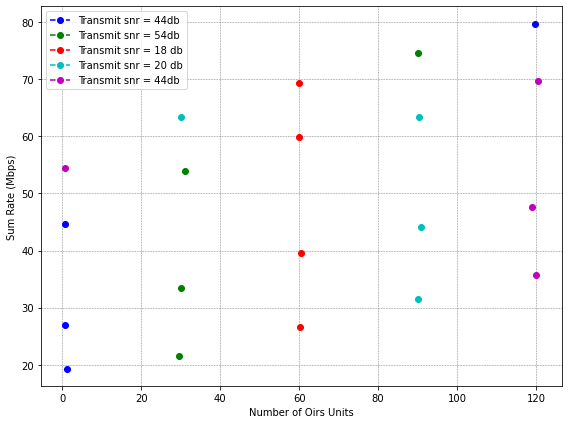

In [46]:
import matplotlib.pyplot as plt

# Provided data for the lines
line_data = [
    {"x": "1.1826514181701386", "y": "19.328858403170237"},
    {"x": "29.566360645396657", "y": "21.442948960757388"},
    {"x": "60.31537270896345", "y": "26.577179584302964"},
    {"x": "90.07883941768368", "y": "31.56038851540556"},
    {"x": "120.03942722795618", "y": "35.6375825008311"},
    {"x": "150.19712110155223", "y": "40.01677378755028"},
    {"x": "0.5913257090850728", "y": "26.879194166943698"},
    {"x": "29.960572772043818", "y": "33.372481771699064"},
    {"x": "60.51247877228702", "y": "39.56375479381369"},
    {"x": "90.86727870920667", "y": "44.09395625207775"},
    {"x": "119.05388187310963", "y": "47.56710955132374"},
    {"x": "150", "y": "51.79530218739611"},
    {"x": "0.788431772408647", "y": "44.697985417359256"},
    {"x": "30.94611812689037", "y": "53.909392744983265"},
    {"x": "59.921160582316304", "y": "59.79865694490617"},
    {"x": "90.27596051923597", "y": "63.42281465524801"},
    {"x": "120.43363935460332", "y": "69.76510072913203"},
    {"x": "150.19712110155223", "y": "73.08724673705765"},
    {"x": "149.80290897490508", "y": "83.05368476083447"},
    {"x": "119.64520006308034", "y": "79.73154163313339"},
    {"x": "90.07883941768368", "y": "74.59731388981234"},
    {"x": "59.921160582316304", "y": "69.31207885517091"},
    {"x": "29.960572772043818", "y": "63.42281465524801"},
    {"x": "0.788431772408647", "y": "54.51342191026475"}
]

# Points that should not be used
excluded_points = [
    {"x": "150", "y": "51.79530218739611"},
    {"x": "150.19712110155223", "y": "40.01677378755028"},
    {"x": "150.19712110155223", "y": "73.08724673705765"},
    {"x": "149.80290897490508", "y": "83.05368476083447"},
]

# Exclude the points that should not be used
filtered_line_data = [point for point in line_data if point not in excluded_points]

# Create the plot with potential adjustments based on image description
plt.figure(figsize=(8, 6))  # Adjust figure size if needed

# Customize lines based on image details (replace placeholders)
line_styles = ['--'] * len(filtered_line_data)  # All lines are dotted
colors = ['b', 'g', 'r', 'c', 'm']  # Example colors
labels = ['Transmit snr = 44db', 'Transmit snr = 54db', 'Transmit snr = 18 db', 'Transmit snr = 20 db', 'Transmit snr = 44db']

# Plot each line separately
for i, point in enumerate(filtered_line_data):
    x = float(point['x'])
    y = float(point['y'])
    plt.plot(x, y, marker='o', color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)])

# Create legend with only five entries
handles = [plt.Line2D([], [], color=colors[i % len(colors)], linestyle=line_styles[i % len(line_styles)], marker='o') for i in range(5)]
plt.legend(handles, labels, loc='best')

# Customize gridlines, markers, colors, labels, etc. (use image details)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')  # Example gridline customization
plt.xlabel('Number of Oirs Units')  # Replace with actual label if present
plt.ylabel('Sum Rate (Mbps)')  # Replace with actual label if present
plt.tight_layout()
plt.show()
